In [2]:
import pandas as pd
import pathlib 

In [3]:
PROCESSED_DIR = pathlib.Path("../data/processed/")
RAW_DIR = pathlib.Path("../data/raw/")
relevant_entries = ["Bad","Stadion", "Parking", "West", "Lene", "VIP", "Gaeste"]

In [23]:
def filter_relevant_values(df: pd.DataFrame) -> pd.DataFrame:
    df["Date"] = pd.to_datetime(df.Date)
    df = df.query("Result == 'VALID'")
    df = df.resample("5min",on="Date").count()
    df = df.rename(columns={"ClientId": "CountOfPersons"})
    final_df = df.drop(columns=list(df.columns[1:]))
    return final_df
    

In [25]:
for csv_file in RAW_DIR.glob("*.csv"):
    for entry in relevant_entries:
        df = pd.read_csv(csv_file)
        df = df.query(f"NewSection == '{entry}'")
        try:
            final_df  = filter_relevant_values(df=df)
        except AttributeError:
            print(csv_file.name)
            continue
        file_name = PROCESSED_DIR / f"{entry}_{csv_file.name}"
        final_df.to_csv(file_name)

202110222142_scanExport_6589.csv
202110222141_scanExport_7008.csv
202110222141_scanExport_6784.csv
202110222142_scanExport_6737.csv
202110222139_scanExport_7189.csv
202110222141_scanExport_7088.csv
202110222140_scanExport_3707.csv


In [34]:
not_processed_files = ["202110222142_scanExport_6589.csv",
"202110222141_scanExport_7008.csv",
"202110222141_scanExport_6784.csv",
"202110222142_scanExport_6737.csv",
"202110222139_scanExport_7189.csv",
"202110222141_scanExport_7088.csv",
"202110222140_scanExport_3707.csv"]
for csv_file in not_processed_files:
    for entry in relevant_entries:
        df = pd.read_csv(RAW_DIR / csv_file)
        df = df.query(f"NewSection == '{entry}'")
        if len(df) == 0:
            print(f"No data for csv '{csv_file}' and '{entry}'")
            continue
        df["Date"] = pd.to_datetime(df.Date, dayfirst=False)
        df = df.query("Result == 'VALID'")
        df = df.resample("5min",on="Date").count()
        df = df.rename(columns={"ClientId": "CountOfPersons"})
        final_df = df.drop(columns=list(df.columns[1:]))
        file_name = PROCESSED_DIR / f"{entry}_{csv_file}"
        final_df.to_csv(file_name)

No data for csv '202110222142_scanExport_6589.csv' and 'Stadion'
No data for csv '202110222141_scanExport_7008.csv' and 'Stadion'
No data for csv '202110222141_scanExport_6784.csv' and 'Stadion'
No data for csv '202110222142_scanExport_6737.csv' and 'Stadion'
No data for csv '202110222139_scanExport_7189.csv' and 'Stadion'
No data for csv '202110222141_scanExport_7088.csv' and 'Stadion'
No data for csv '202110222140_scanExport_3707.csv' and 'Stadion'


In [18]:
df = pd.read_csv("../data/raw/202110222142_scanExport_6589.csv")

In [11]:
df["Date"] = pd.to_datetime(df.Date, dayfirst=False)#format="""%m/%d/%y %H:%M:%S""",)

In [12]:
df = df.query("Result == 'VALID'")
df = df.resample("5min",on="Date").count()
df = df.rename(columns={"ClientId": "CountOfPersons"})
final_df = df.drop(columns=list(df.columns[1:]))

<AxesSubplot:xlabel='Date'>

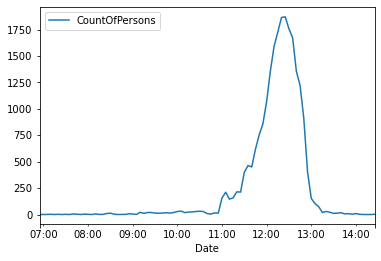

In [14]:
final_df.plot()

In [15]:
final_df.to_csv(PROCESSED_DIR / csv_file.name)

,CountOfPersons
Date,
2019-10-26 06:55:00,1
2019-10-26 07:00:00,0
2019-10-26 07:05:00,1
2019-10-26 07:10:00,2
2019-10-26 07:15:00,0
...,...
2019-10-26 14:05:00,2
2019-10-26 14:10:00,0
2019-10-26 14:15:00,0
